In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.cross_validation import cross_val_score,cross_val_predict,StratifiedKFold
from sklearn import linear_model, svm
from sklearn.ensemble import GradientBoostingRegressor as xgb 
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from scipy import stats 


In [35]:
train=pd.read_csv('D:/Projects/Housing Prices/train.csv')
test=pd.read_csv('D:/Projects/Housing Prices/test.csv')
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
frac=train.shape[0]*0.9
percent_missing=(100*(train.isnull().sum())/train.shape[0]).round(1)
percent_missing.sort_values(ascending=False).head(20)

PoolQC          99.5
MiscFeature     96.3
Alley           93.8
Fence           80.8
FireplaceQu     47.3
LotFrontage     17.7
GarageCond       5.5
GarageType       5.5
GarageYrBlt      5.5
GarageFinish     5.5
GarageQual       5.5
BsmtExposure     2.6
BsmtFinType2     2.6
BsmtFinType1     2.5
BsmtCond         2.5
BsmtQual         2.5
MasVnrArea       0.5
MasVnrType       0.5
Electrical       0.1
Utilities        0.0
dtype: float64

In [39]:
train_cat = train[['BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual','Electrical','MasVnrArea','MasVnrType', 'GarageCond'
                   ,'GarageFinish','GarageQual','GarageType','GarageYrBlt','MiscFeature','Fence','PoolQC','PoolArea','Alley'
                   ,'FireplaceQu']]
train_cat.head(5)

,BsmtFinType1,BsmtFinType2,BsmtCond,BsmtQual,Electrical,MasVnrArea,MasVnrType,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,MiscFeature,Fence,PoolQC,PoolArea,Alley,FireplaceQu
0,GLQ,Unf,TA,Gd,SBrkr,196.0,BrkFace,TA,RFn,TA,Attchd,2003.0,NaN,NaN,NaN,0,NaN,NaN
1,ALQ,Unf,TA,Gd,SBrkr,0.0,None,TA,RFn,TA,Attchd,1976.0,NaN,NaN,NaN,0,NaN,TA
2,GLQ,Unf,TA,Gd,SBrkr,162.0,BrkFace,TA,RFn,TA,Attchd,2001.0,NaN,NaN,NaN,0,NaN,TA
3,ALQ,Unf,Gd,TA,SBrkr,0.0,None,TA,Unf,TA,Detchd,1998.0,NaN,NaN,NaN,0,NaN,Gd
4,GLQ,Unf,TA,Gd,SBrkr,350.0,BrkFace,TA,RFn,TA,Attchd,2000.0,NaN,NaN,NaN,0,NaN,TA


In [40]:
Categories = ['BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual','MasVnrType', 'GarageCond','GarageFinish','GarageQual'
              ,'GarageType','GarageYrBlt','MiscFeature','FireplaceQu','Fence','PoolQC','Alley']
train[Categories]=train[Categories].replace(np.nan,'None',inplace=True)
train.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [41]:
Noncat = ['LotFrontage','MasVnrArea']
imp=preprocessing.Imputer(missing_values='NaN',copy=False,strategy='mean',axis=0)
imp.fit(train[Noncat])
train=pd.get_dummies(data=train)

In [42]:
corr1=train.corr()['SalePrice']
corr=corr1[np.abs(corr1)>0.5]
corr=pd.DataFrame(data=corr,columns=['SalePrice'])
corr=corr.drop_duplicates().sort_values('SalePrice',ascending=False)
corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


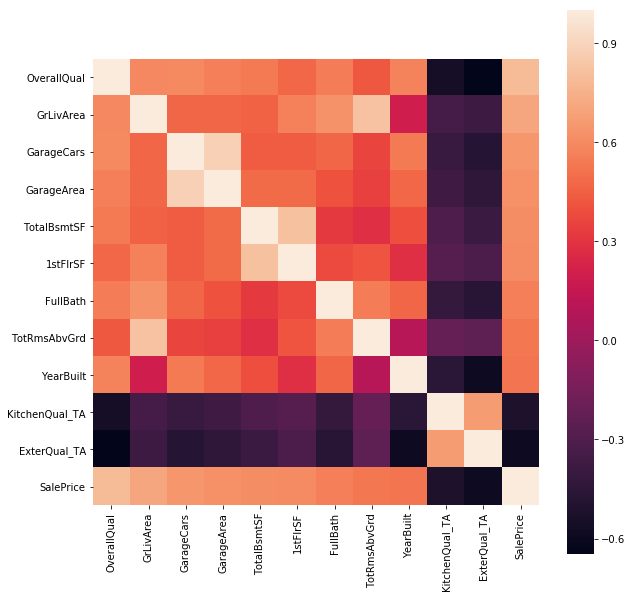

In [43]:
corr_var = ['OverallQual','GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','KitchenQual_TA', 'ExterQual_TA','SalePrice']
train = train[corr_var]
train
corr_matrix = train.corr()
f,ax = plt.subplots(figsize =(10,10))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, vmax=1,square=True)

In [44]:
labels_to_drop = ['GarageArea','TotRmsAbvGrd','1stFlrSF', 'KitchenQual_TA','ExterQual_TA']
train = train.drop(labels_to_drop, axis =1)
train.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,7,1710,2,856,2,2003,208500
1,6,1262,2,1262,2,1976,181500
2,7,1786,2,920,2,2001,223500
3,7,1717,3,756,1,1915,140000
4,8,2198,3,1145,2,2000,250000
5,5,1362,2,796,1,1993,143000
6,8,1694,2,1686,2,2004,307000
7,7,2090,2,1107,2,1973,200000
8,7,1774,2,952,2,1931,129900
9,5,1077,1,991,1,1939,118000


Text(0.5,1,'Sale Price vs Garage Cars')

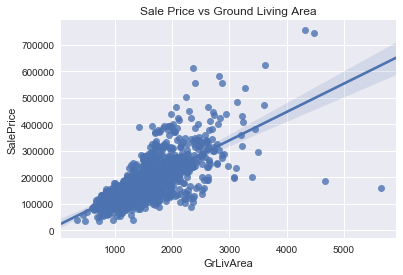

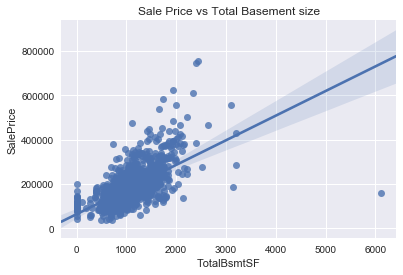

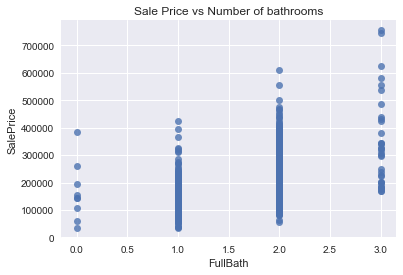

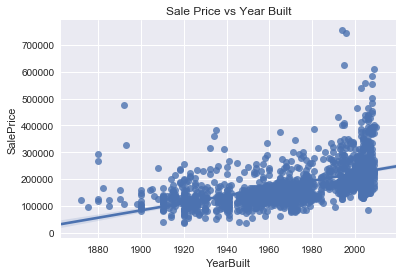

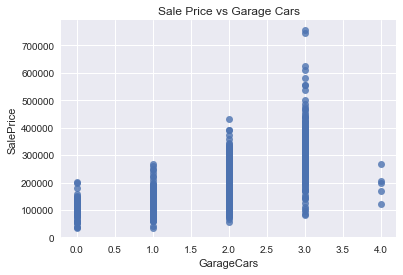

In [45]:
plt.figure(1)
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=train)
plt.title('Sale Price vs Ground Living Area')

plt.figure(2)
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=train)
plt.title('Sale Price vs Total Basement size')

plt.figure(3)
sns.set(color_codes=True)
ax = sns.regplot(x="FullBath", y="SalePrice", data=train, fit_reg = False)
plt.title('Sale Price vs Number of bathrooms')

plt.figure(4)
sns.set(color_codes=True)
ax = sns.regplot(x="YearBuilt", y="SalePrice", data=train)
plt.title('Sale Price vs Year Built')


plt.figure(5)
sns.set(color_codes=True)
ax = sns.regplot(x="GarageCars", y="SalePrice", data=train, fit_reg = False)
plt.title('Sale Price vs Garage Cars')

In [46]:
train =train.drop(train[train.GrLivArea == 5642].index)
train =train.drop(train[train.GrLivArea == 4476].index)
train =train.drop(train[train.SalePrice == 755000].index)
train =train.drop(train[train.SalePrice == 745000].index)

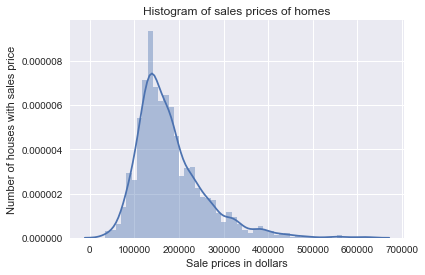

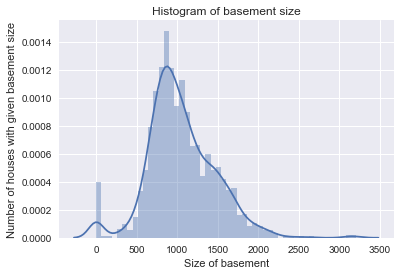

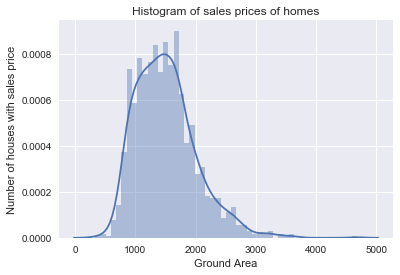

In [47]:
plt.figure(1)
sns.distplot(train['SalePrice'], 50)
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()


plt.figure(2)
sns.distplot(train['TotalBsmtSF'], 50)
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size")
plt.grid(True) 
plt.show()

plt.figure(3)
sns.distplot(train['GrLivArea'], 50)
plt.xlabel("Ground Area")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()

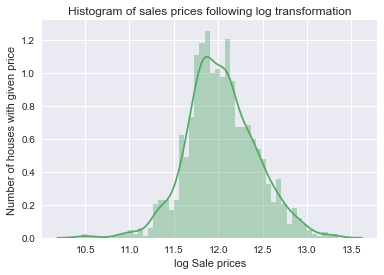

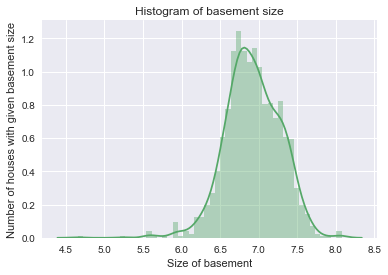

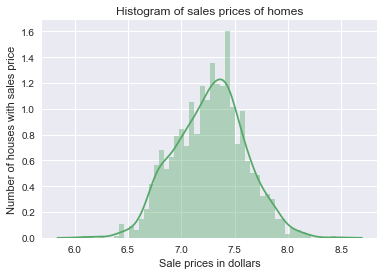

In [48]:
train_new = train.drop(train[train['TotalBsmtSF']==0].index, axis =0)

train_new.loc[:,['SalePrice','TotalBsmtSF','GrLivArea','YearBuilt']] = np.log(train_new[['SalePrice','TotalBsmtSF','GrLivArea','YearBuilt']])
plt.figure(1)
sns.distplot(train_new['SalePrice'], 50, color = "g")
plt.xlabel("log Sale prices")
plt.ylabel("Number of houses with given price") 
plt.title("Histogram of sales prices following log transformation")
plt.grid(True) 
plt.show()

plt.figure(2)
sns.distplot(train_new['TotalBsmtSF'], 50, color ="g")
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size")
plt.grid(True) 
plt.show()

plt.figure(3)
sns.distplot(train_new['GrLivArea'], 50, color ="g")
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()

Text(0.5,1,'Log Sale Price vs Log Total Basement size')

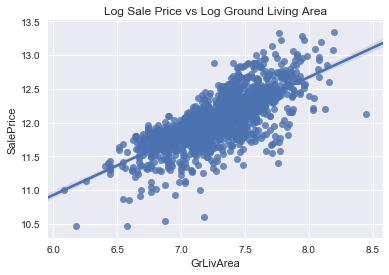

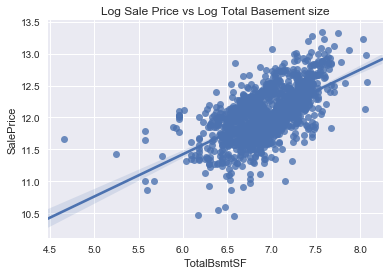

In [49]:
plt.figure()
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=train_new)
plt.title('Log Sale Price vs Log Ground Living Area')

plt.figure()
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=train_new)
plt.title('Log Sale Price vs Log Total Basement size')

In [50]:
var = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath','YearBuilt']
test_id = test[['Id']]  
test = test[var]
test.head(10)
test.shape[0] -((test[test.notnull()].count())) 
test['GarageCars'] = test['GarageCars'].fillna((test['GarageCars'].mean()))
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna((test['TotalBsmtSF'].mean()))
test[['TotalBsmtSF']] = test[['TotalBsmtSF']].replace(0,1)
test.loc[:,['TotalBsmtSF','GrLivArea', 'YearBuilt']] = np.log(test[['TotalBsmtSF','GrLivArea','YearBuilt']])

In [51]:
train_y = train_new['SalePrice']  #saving the output variable as a seperate dataset 
train_x = train_new.drop('SalePrice', axis =1) # dropping output variable from train dataset 
train_x.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,7,7.444249,2,6.752270,2,7.602401
1,6,7.140453,2,7.140453,2,7.588830
2,7,7.487734,2,6.824374,2,7.601402
3,7,7.448334,3,6.628041,1,7.557473
4,8,7.695303,3,7.043160,2,7.600902
5,5,7.216709,2,6.679599,1,7.597396
6,8,7.434848,2,7.430114,2,7.602900
7,7,7.644919,2,7.009409,2,7.587311
8,7,7.480992,2,6.858565,2,7.565793
9,5,6.981935,1,6.898715,1,7.569928


In [52]:
clf_Ridge = linear_model.Ridge(fit_intercept=True, normalize=True, alpha = 0.01) 
clf_Ridge.fit(train_x, train_y)  
clf_Ridge_score = cross_val_score(clf_Ridge,train_x, train_y, cv = 10, scoring = 'r2')
X_scaler = preprocessing.StandardScaler()
train_x = X_scaler.fit_transform(train_x)
clf_SVR = svm.SVR(kernel='rbf', gamma='auto',C = 1,epsilon = 0.1)
clf_SVR.fit(train_x, train_y)
clf_SVR_score = cross_val_score(clf_SVR, train_x, train_y, cv = 10, scoring='r2')
clf_lasso = linear_model.LassoCV()
clf_lasso.fit(train_x, train_y)
clf_lasso_score = cross_val_score(clf_lasso, train_x, train_y, cv = 10, scoring='r2') 
clf_xgb = xgb(learning_rate=0.01, n_estimators=500, max_depth=3, subsample= 0.5)
clf_xgb.fit(train_x, train_y)
clf_xgb_score = cross_val_score(clf_xgb, train_x, train_y, cv = 10, scoring='r2') 
print ("")
print("The R2 score using for Ridge is %f" % (clf_Ridge_score.mean()))
print("The R2 score for Lasso is %f" % (clf_lasso_score.mean())) 
print("The R2 score for SVR is %f" % (clf_SVR_score.mean())) 
print("The R2 score for Gradient Boosting Regression is %f" % (clf_xgb_score.mean())) 

test_x = X_scaler.fit_transform(test)
predict = pd.DataFrame(np.exp(clf_xgb.predict(test_x)), columns= ['SalePrice'])


The R2 score using for Ridge is 0.825067
The R2 score for Lasso is 0.825010
The R2 score for SVR is 0.826482
The R2 score for Gradient Boosting Regression is 0.833720


In [54]:
submission = pd.concat([test_id, predict],axis =1)
submission.to_csv('D:/Projects/Housing Prices/submission.csv')